In [1]:
import os
import logging
import scanpy as sc
import random
import sklearn

In [2]:
import palantir
import scanpy as sc
import pandas as pd
import os 
import gc
import random

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import warnings 
from numba.core.errors import NumbaDeprecationWarning
%matplotlib inline

In [3]:
adata = sc.read_h5ad(
    "../output/scVI/invitroInvivoUpdated.h5ad")

In [4]:
adata.layers['scvi_normalized'][4].sum()

100000.0

In [5]:
adata.X

<43142x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 20108369 stored elements in Compressed Sparse Row format>

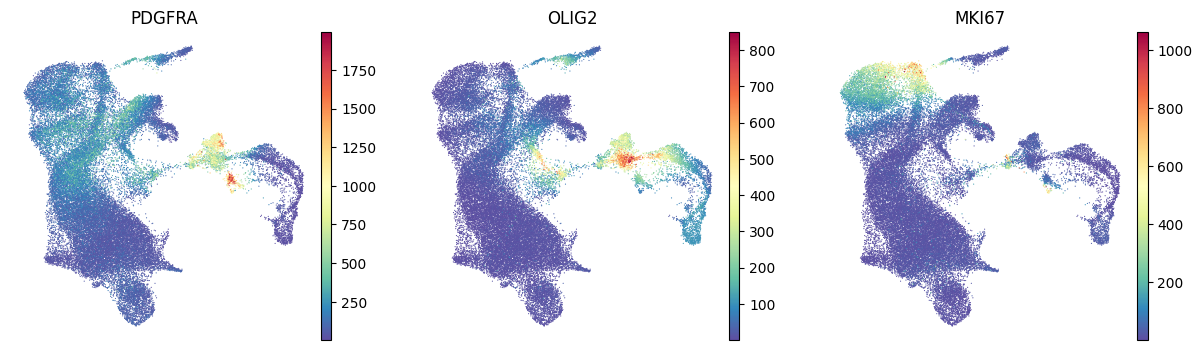

In [6]:
sc.pl.embedding(
    adata,
    basis="umap",
    layer="scvi_normalized",
    color=["PDGFRA", "OLIG2", "MKI67"],
    frameon=False,
)
plt.show()

In [7]:
adata.X = adata.layers["scvi_normalized"]

In [8]:
palantir.preprocess.log_transform(adata)

In [9]:
adata.X[3].sum()

15584.82

In [10]:
sc.pp.pca(adata)

In [11]:
adata.obsm["X_pca"]

array([[ 3.1593168e+01,  6.4072212e+01, -4.5762653e+01, ...,
         1.1997517e+00,  5.8335108e-01,  8.5196871e-01],
       [ 3.3140942e+01,  6.1103703e+01, -4.5856098e+01, ...,
         1.7738142e+00,  7.4304067e-02,  1.2902696e+00],
       [ 1.4699435e+01,  8.9741096e+01, -5.6570580e+01, ...,
        -3.2760298e-01, -2.5902686e+00,  1.0395973e+00],
       ...,
       [ 2.3601608e+01,  6.7755081e+01, -5.0881592e+01, ...,
        -9.9313152e-01, -1.0934174e-01, -3.9615628e-01],
       [ 1.0176787e+01,  7.9011574e+01, -4.3850983e+01, ...,
         8.1300741e-01,  7.2399771e-01, -3.4481651e-01],
       [ 4.2767006e+01,  7.4538666e+01, -1.1802721e+01, ...,
        -8.6501408e-01, -1.5111189e+00, -2.2425961e-01]], dtype=float32)

In [12]:
dm_res = palantir.utils.run_diffusion_maps(adata, n_components=10)

/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
ms_data = palantir.utils.determine_multiscale_space(adata, n_eigs=5)

In [14]:
ms_data

,0,1,2,3
AAACCCAGTAGGCAAC_GOL-2512A5,14.521589,-0.400309,-1.561135,0.017982
AAACGAATCAGACCTA_GOL-2512A5,14.547976,-0.399463,-1.599727,-0.024586
AAACGCTTCAACCGAT_GOL-2512A5,15.861297,-0.400789,-2.582564,-0.405070
AAACGCTTCAATGCAC_GOL-2512A5,15.413804,-0.390428,-1.739449,-0.128062
AAAGAACCATAACTCG_GOL-2512A5,13.713504,-0.240637,-1.612404,0.189245
...,...,...,...,...
TTTGTCAAGTGAATTG_Sample_WA09_Shiv,15.179502,-0.381651,-1.319311,0.130418
TTTGTCACAGGTCGTC_Sample_WA09_Shiv,15.478392,-0.391285,-1.631040,-0.053017
TTTGTCACATTGAGCT_Sample_WA09_Shiv,15.045208,-0.369763,-0.678007,0.711547
TTTGTCAGTCGTGGCT_Sample_WA09_Shiv,15.523643,-0.392879,-1.665095,-0.069193


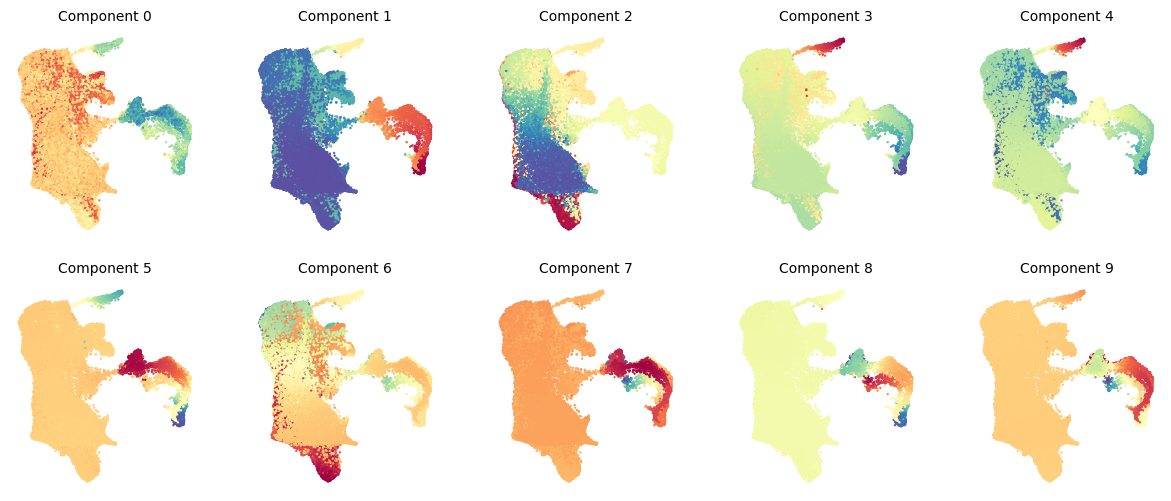

In [15]:


palantir.plot.plot_diffusion_components(adata)
plt.show()



In [17]:
start_cell = "CCTCATGAGCCAAGTG_Sample_C27_CD140_3"

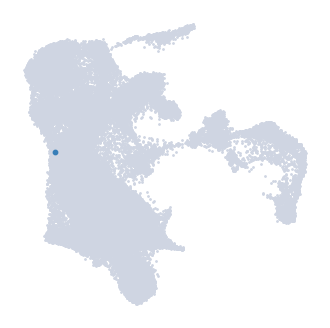

In [18]:
cells = ["CCTCATGAGCCAAGTG_Sample_C27_CD140_3"]



palantir.plot.highlight_cells_on_umap(adata, cells)
plt.show()



In [19]:
terminal_states = pd.Series(
    ["Oligo", "Astro", "NPC"],
    index=[
          random.choice(list(adata.obs.loc[adata.obs['leiden_scVI'] == "8"].index)),         
        random.choice(list(adata.obs.loc[adata.obs['leiden_scVI'] == "9"].index)),
    random.choice(list(adata.obs.loc[adata.obs['leiden_scVI'] == "6"].index))]
    
)

In [27]:
terminal_states =  pd.Series(
    ["Oligo", "Astro", "NPC"],
    index=["ATCACGAGTTGGTGGA_Sample_32", "CAGTCCTCACGAAACG_Sample_WA09_Shiv", "ACACAGTCAAATACAG_Sample_C27_DAPI_3"])

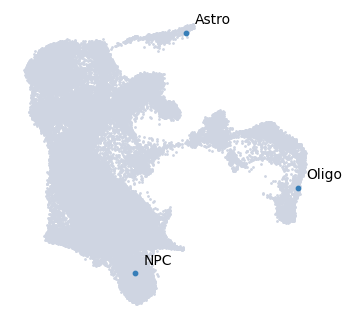

In [ ]:
palantir.plot.highlight_cells_on_umap(adata, terminal_states)
plt.show()

In [29]:
pr_res = palantir.core.run_palantir(
    adata, num_waypoints=500, early_cell= start_cell, terminal_states = terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.009278333187103272 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.13092301686604818 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


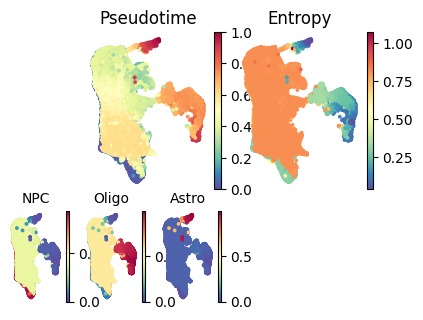

In [30]:
fig=palantir.plot.plot_palantir_results(adata, s = 3)
fig.set_size_inches(4.5, 3, forward = True)

In [31]:
# Inspect branches
masks=palantir.presults.select_branch_cells(adata, eps=0)

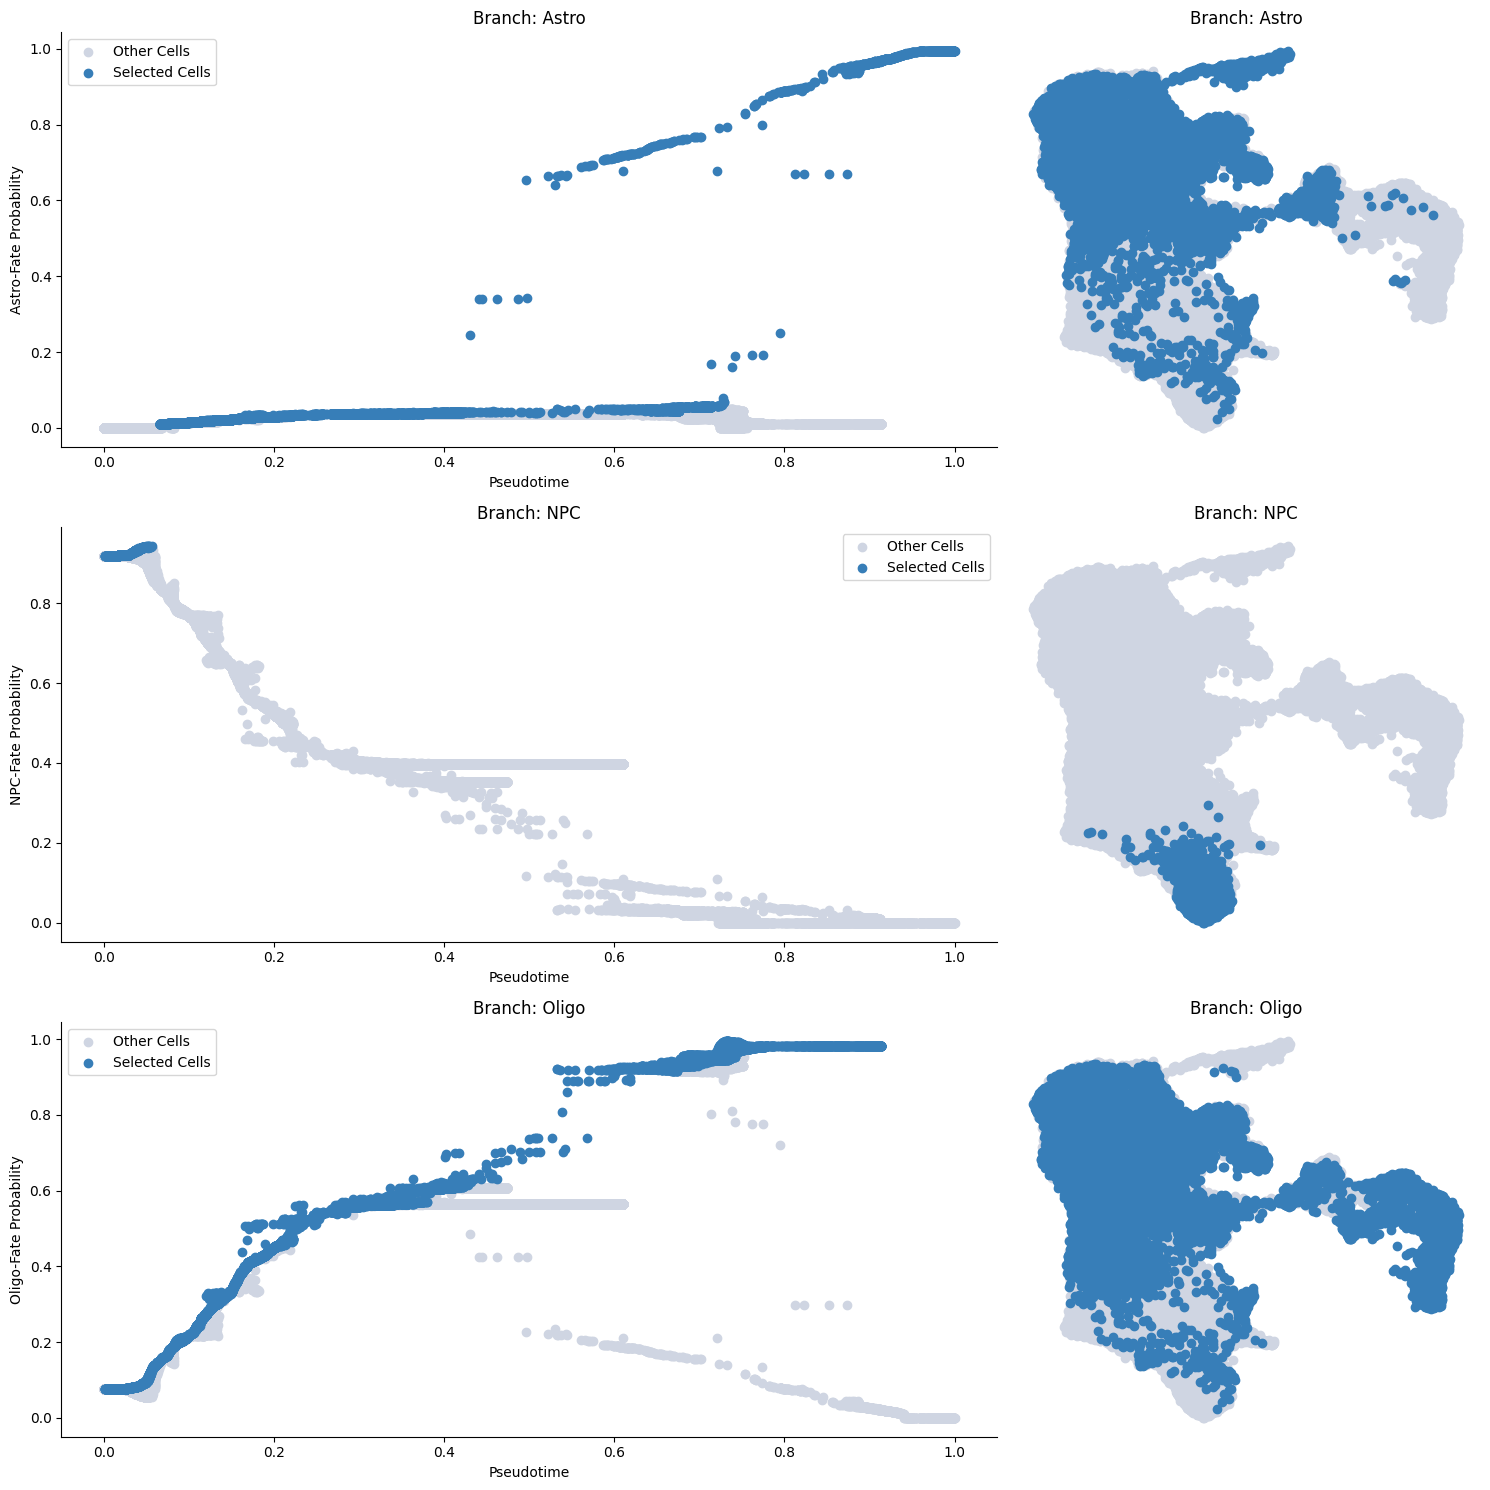

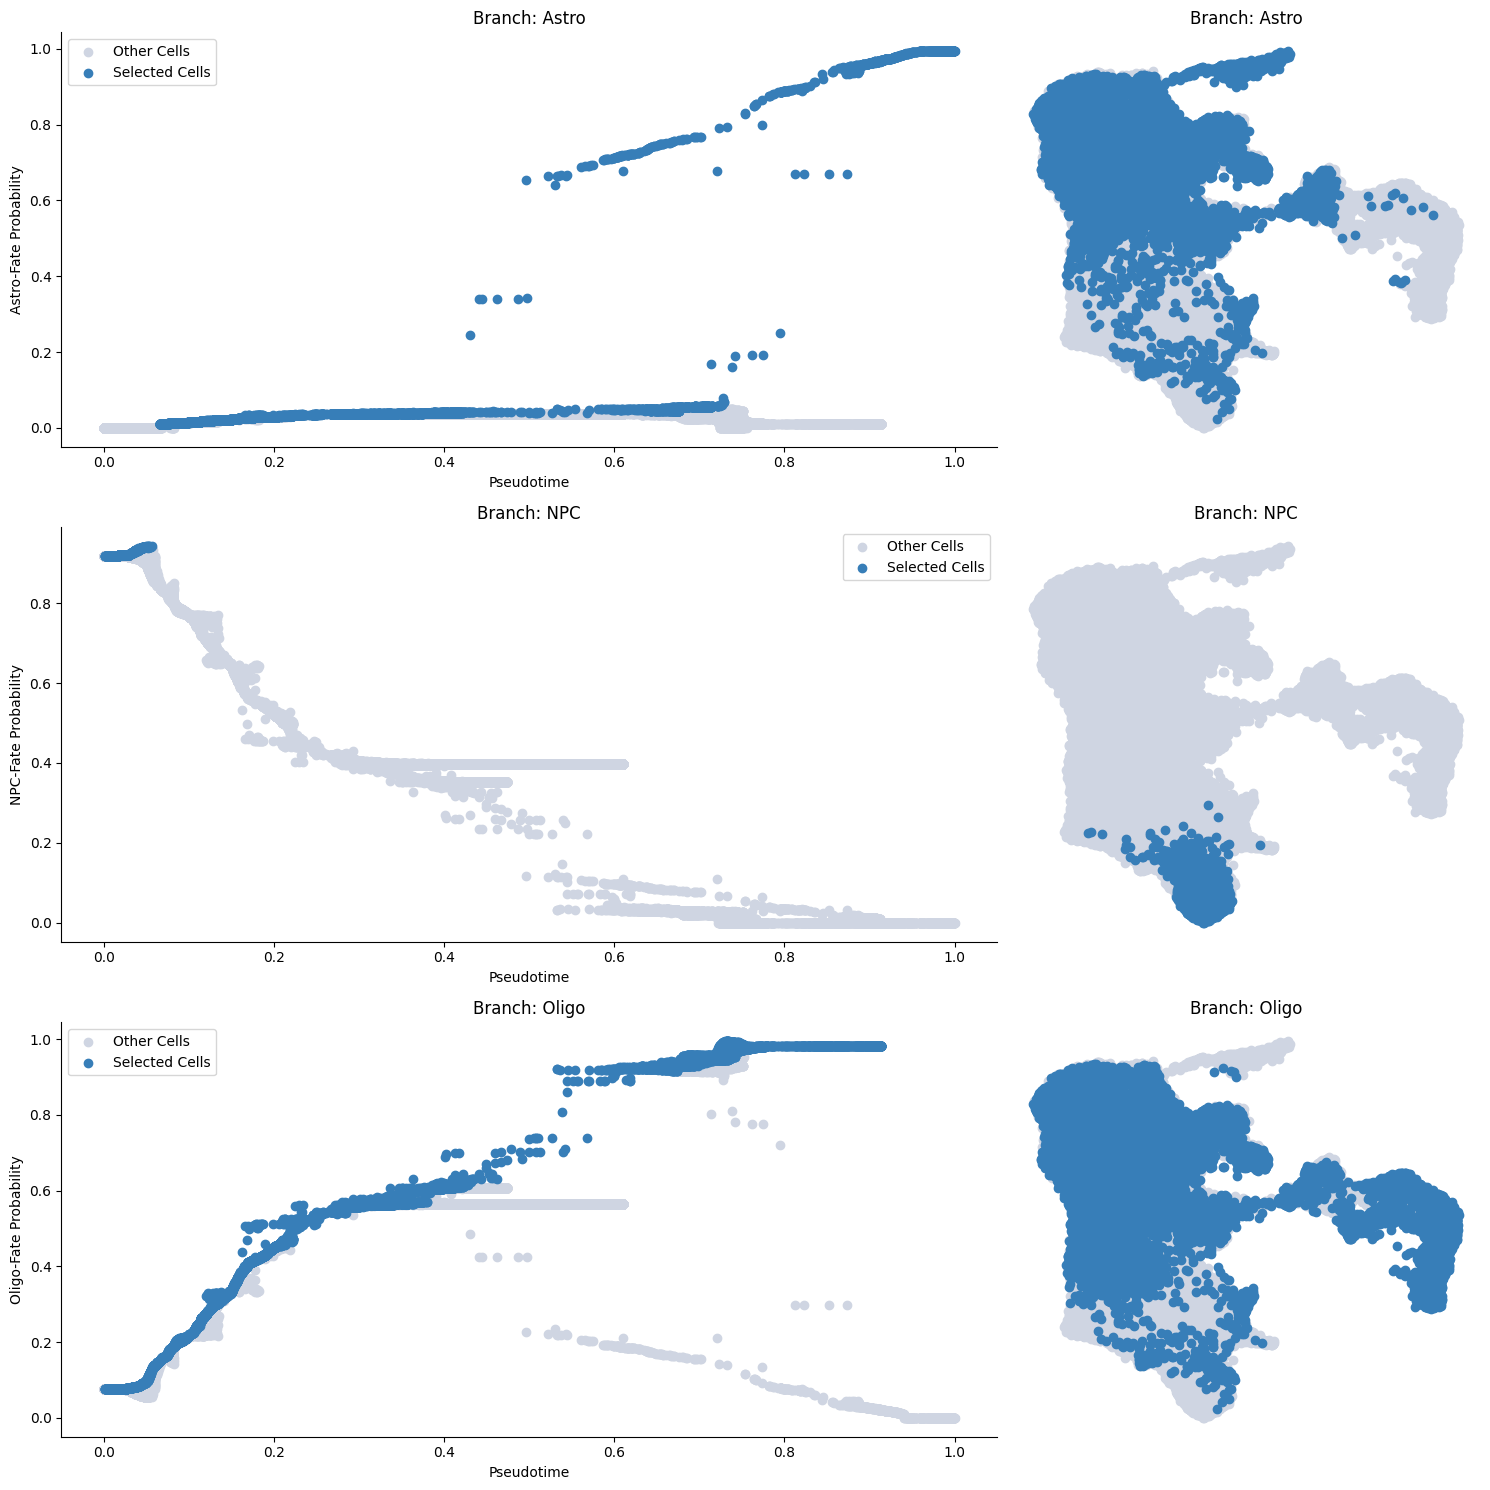

In [32]:
palantir.plot.plot_branch_selection(adata)

In [36]:
metaData = adata.obs

In [37]:
metaData

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,cellName,line,chemistry,stage,sort,concat,_scvi_batch,_scvi_labels,leiden_scVI,palantir_pseudotime,palantir_entropy
AAACCCAGTAGGCAAC_GOL-2512A5,GOL-2512A5,17722.0,5435,3.317910,AAACCCAGTAGGCAAC_GOL-2512A5,C27,v3.1,In Vivo,DAPI-,C27v3.1,0,0,7,0.706641,0.243097
AAACGAATCAGACCTA_GOL-2512A5,GOL-2512A5,18058.0,5364,4.374792,AAACGAATCAGACCTA_GOL-2512A5,C27,v3.1,In Vivo,DAPI-,C27v3.1,0,0,7,0.706381,0.240184
AAACGCTTCAACCGAT_GOL-2512A5,GOL-2512A5,4402.0,2166,12.562472,AAACGCTTCAACCGAT_GOL-2512A5,C27,v3.1,In Vivo,DAPI-,C27v3.1,0,0,7,0.754797,0.143364
AAACGCTTCAATGCAC_GOL-2512A5,GOL-2512A5,2795.0,1653,1.860465,AAACGCTTCAATGCAC_GOL-2512A5,C27,v3.1,In Vivo,DAPI-,C27v3.1,0,0,7,0.737265,0.209748
AAAGAACCATAACTCG_GOL-2512A5,GOL-2512A5,2660.0,1521,12.744361,AAAGAACCATAACTCG_GOL-2512A5,C27,v3.1,In Vivo,DAPI-,C27v3.1,0,0,5,0.702440,0.255759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTGAATTG_Sample_WA09_Shiv,Sample_WA09_Shiv,9481.0,3344,5.284253,TTTGTCAAGTGAATTG_Sample_WA09_Shiv,WA09,v2,In Vivo,DAPI-,WA09v2,0,0,7,0.725225,0.248314
TTTGTCACAGGTCGTC_Sample_WA09_Shiv,Sample_WA09_Shiv,4785.0,2268,3.218391,TTTGTCACAGGTCGTC_Sample_WA09_Shiv,WA09,v2,In Vivo,DAPI-,WA09v2,0,0,7,0.739343,0.216536
TTTGTCACATTGAGCT_Sample_WA09_Shiv,Sample_WA09_Shiv,5862.0,2682,3.241215,TTTGTCACATTGAGCT_Sample_WA09_Shiv,WA09,v2,In Vivo,DAPI-,WA09v2,0,0,7,0.740961,0.272264
TTTGTCAGTCGTGGCT_Sample_WA09_Shiv,Sample_WA09_Shiv,9166.0,3269,5.945887,TTTGTCAGTCGTGGCT_Sample_WA09_Shiv,WA09,v2,In Vivo,DAPI-,WA09v2,0,0,7,0.737994,0.212109


In [38]:
adata.obsm["branch_masks"]

,NPC,Oligo,Astro
AAACCCAGTAGGCAAC_GOL-2512A5,False,True,False
AAACGAATCAGACCTA_GOL-2512A5,False,True,False
AAACGCTTCAACCGAT_GOL-2512A5,False,True,False
AAACGCTTCAATGCAC_GOL-2512A5,False,True,False
AAAGAACCATAACTCG_GOL-2512A5,False,True,False
...,...,...,...
TTTGTCAAGTGAATTG_Sample_WA09_Shiv,False,True,False
TTTGTCACAGGTCGTC_Sample_WA09_Shiv,False,True,False
TTTGTCACATTGAGCT_Sample_WA09_Shiv,False,False,False
TTTGTCAGTCGTGGCT_Sample_WA09_Shiv,False,True,False


In [40]:
metaData = pd.concat([metaData, adata.obsm["palantir_fate_probabilities"], adata.obsm["branch_masks"]], axis=1)

In [41]:
metaData.to_csv('../output/Palantir/palantirInvitroInvivoMetadata.csv')


In [ ]:
adata.obsm["palantir_fate_probabilities"]

[2024-03-14 14:18:53,442] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (14,760) and rank = 1.0.
[2024-03-14 14:18:53,442] [INFO    ] Using covariance function Matern52(ls=0.6866057395935059).
[2024-03-14 14:18:53,443] [INFO    ] Computing 50 landmarks with k-means clustering.


/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


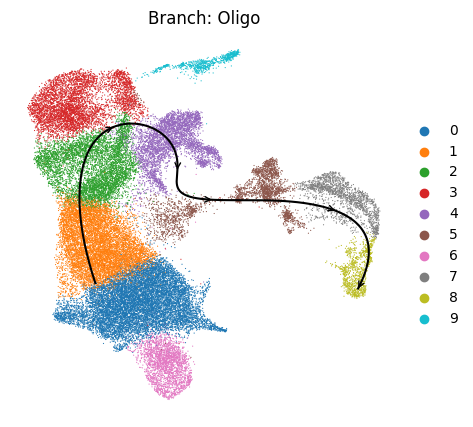

In [46]:
palantir.plot.plot_trajectory(adata, "Oligo",
                                 cell_color="leiden_scVI",smoothness= .5)
plt.savefig("../output/Figures/Invitro/OligoTrajectory.pdf", format="pdf", bbox_inches="tight")

[2024-03-14 13:27:34,455] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (11,111) and rank = 1.0.
[2024-03-14 13:27:34,456] [INFO    ] Using covariance function Matern52(ls=0.6866057395935059).
[2024-03-14 13:27:34,456] [INFO    ] Computing 50 landmarks with k-means clustering.


/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


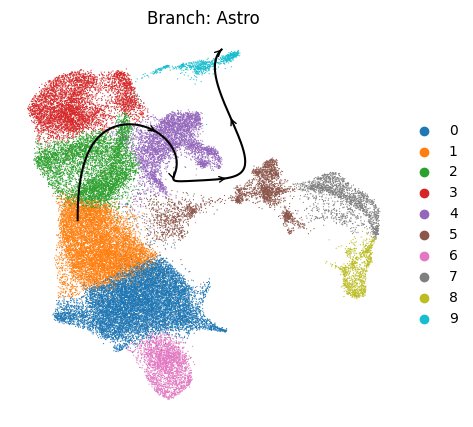

In [45]:
palantir.plot.plot_trajectory(adata, "Astro", cell_color="leiden_scVI", smoothness=.5)
plt.savefig("../output/Figures/Invitro/AstroTrajectory.pdf", format="pdf", bbox_inches="tight")

[2024-03-14 14:19:04,750] [INFO    ] Using sparse Gaussian Process since n_landmarks (50) < n_samples (1,629) and rank = 1.0.
[2024-03-14 14:19:04,750] [INFO    ] Using covariance function Matern52(ls=0.13732114791870118).
[2024-03-14 14:19:04,751] [INFO    ] Computing 50 landmarks with k-means clustering.


/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/palantir_01/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


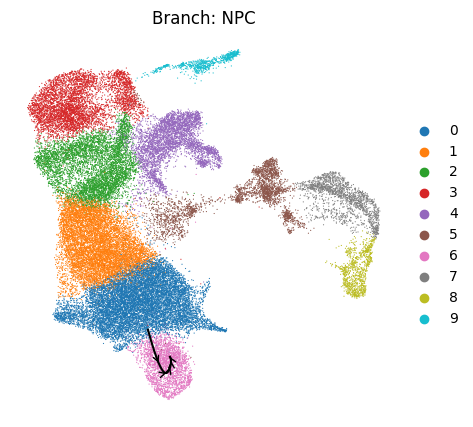

In [47]:
palantir.plot.plot_trajectory(adata, "NPC", smoothness = .1, cell_color = "leiden_scVI")
plt.savefig("../output/Figures/Invitro/NPCTrajectory.pdf", format="pdf", bbox_inches="tight")

In [34]:
gene_trends = palantir.presults.compute_gene_trends(
    adata,
    expression_key="scvi_normalized",
)


NPC
[2024-03-13 21:52:05,544] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (1,629) and rank = 1.0.
[2024-03-13 21:52:05,545] [INFO    ] Using covariance function Matern52(ls=1.0).
Oligo
[2024-03-13 21:52:06,695] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (14,760) and rank = 1.0.
[2024-03-13 21:52:06,696] [INFO    ] Using covariance function Matern52(ls=1.0).
Astro
[2024-03-13 21:52:07,809] [INFO    ] Using sparse Gaussian Process since n_landmarks (500) < n_samples (11,111) and rank = 1.0.
[2024-03-13 21:52:07,817] [INFO    ] Using covariance function Matern52(ls=1.0).


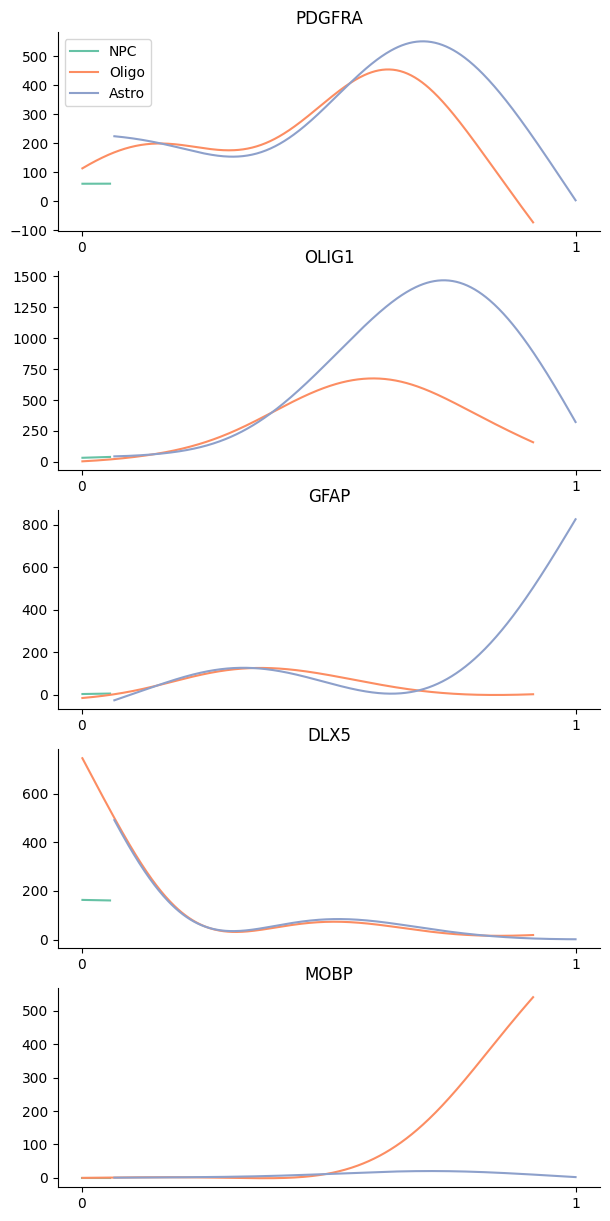

In [35]:
genes = ["PDGFRA", "OLIG1", "GFAP", "DLX5", "MOBP"]
palantir.plot.plot_gene_trends(adata, genes)
plt.show()